In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import cartopy.crs as ccrs
from ipywidgets import interact, SelectionSlider
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from keras import backend as K

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST Tutorial for SciKit RBM

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [19]:
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001) 
X_train = X_train.reshape([-1,28*28]);

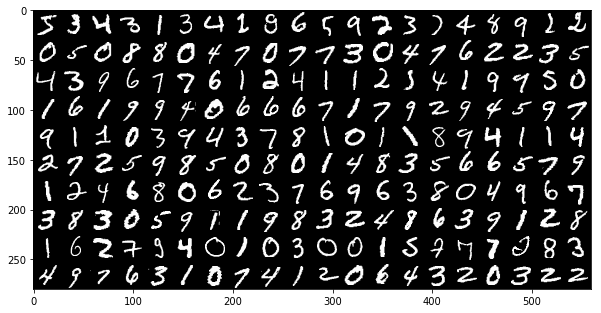

In [21]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train), cmap='gray');

In [22]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)

In [23]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -111.79, time = 6.59s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.05, time = 8.11s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.28, time = 8.32s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.39, time = 8.57s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.74, time = 9.32s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.14, time = 8.26s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.41, time = 8.07s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.12, time = 8.78s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -79.99, time = 8.50s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.95, time = 9.08s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [24]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

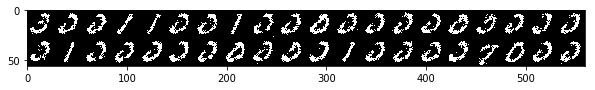

In [26]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx), cmap='gray')

In [27]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

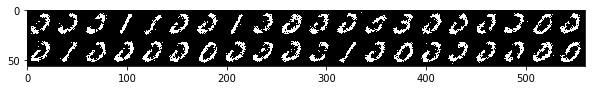

In [29]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx), cmap='gray')

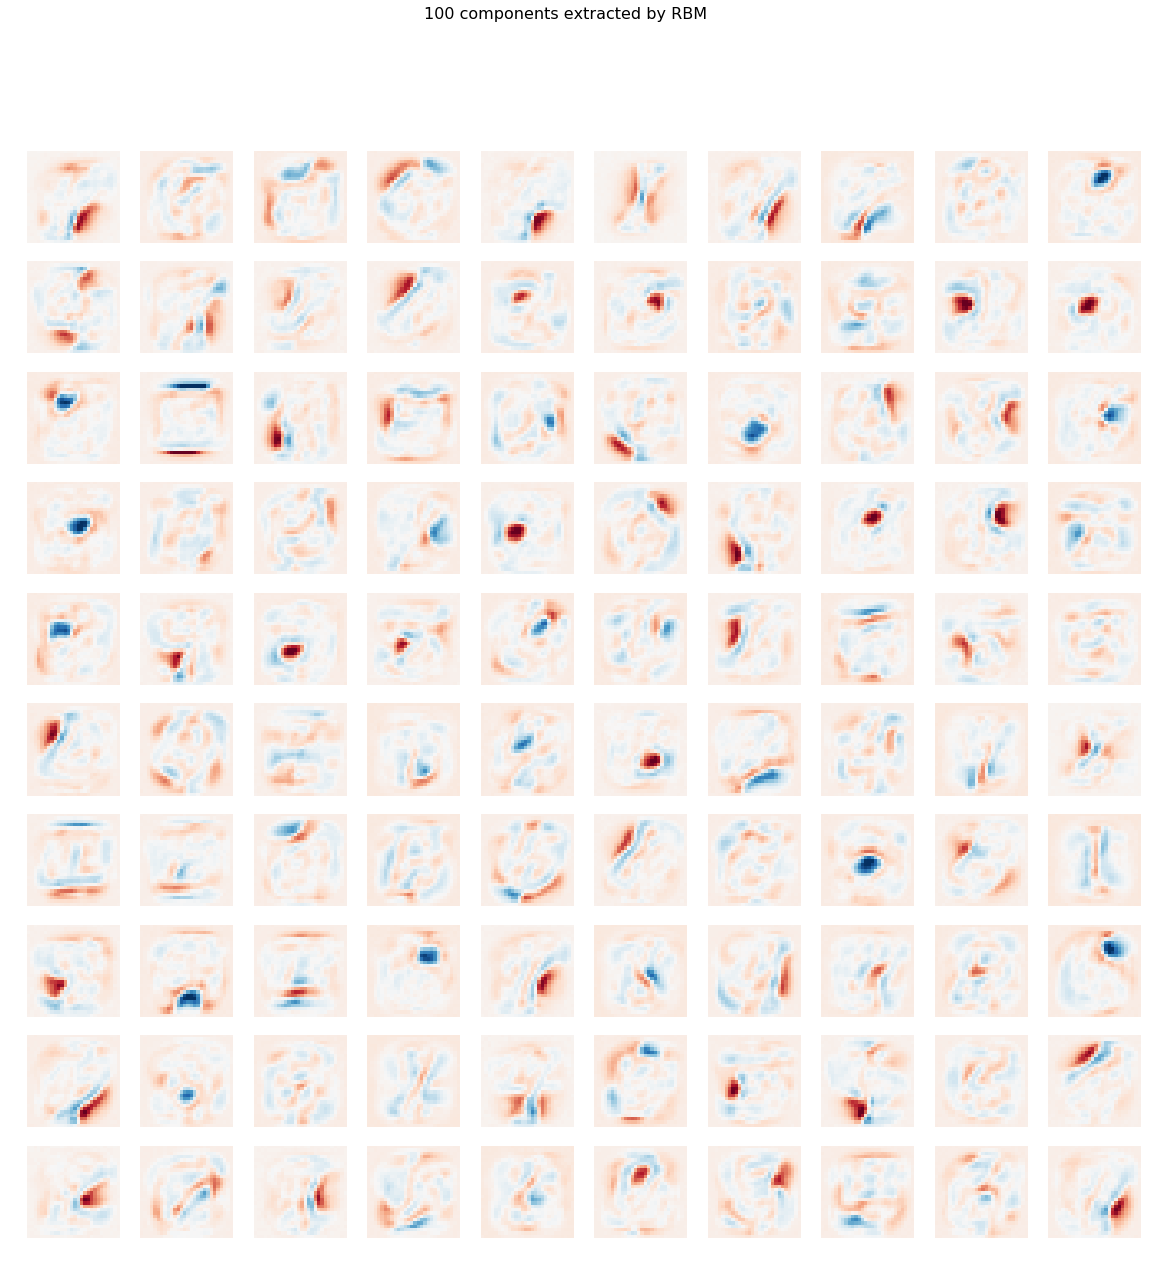

In [30]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);

# QuCumber Ising Example

In [60]:
X_train = pd.read_table('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_data.txt', delimiter=' ', usecols=range(10)).values

In [61]:
X_train.shape

(9999, 10)

In [62]:
print(X_train[0])

[1 1 1 1 0 0 1 0 1 1]


In [63]:
nh = X_train.shape[-1]

In [178]:
rbm = BernoulliRBM(n_components=nh, learning_rate=0.01, random_state=0, n_iter=5000, batch_size=100, verbose=True)

In [179]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -6.93, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -6.93, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.93, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -6.92, time = 0.03s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6.92, time = 0.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -6.92, time = 0.03s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -6.91, time = 0.03s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -6.90, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -6.88, time = 0.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -6.86, time = 0.03s
[BernoulliRBM] Iteration 15, pseudo-likelih

[BernoulliRBM] Iteration 120, pseudo-likelihood = -5.25, time = 0.04s
[BernoulliRBM] Iteration 121, pseudo-likelihood = -5.24, time = 0.04s
[BernoulliRBM] Iteration 122, pseudo-likelihood = -5.23, time = 0.03s
[BernoulliRBM] Iteration 123, pseudo-likelihood = -5.22, time = 0.03s
[BernoulliRBM] Iteration 124, pseudo-likelihood = -5.20, time = 0.03s
[BernoulliRBM] Iteration 125, pseudo-likelihood = -5.19, time = 0.03s
[BernoulliRBM] Iteration 126, pseudo-likelihood = -5.18, time = 0.03s
[BernoulliRBM] Iteration 127, pseudo-likelihood = -5.17, time = 0.03s
[BernoulliRBM] Iteration 128, pseudo-likelihood = -5.15, time = 0.03s
[BernoulliRBM] Iteration 129, pseudo-likelihood = -5.14, time = 0.03s
[BernoulliRBM] Iteration 130, pseudo-likelihood = -5.13, time = 0.03s
[BernoulliRBM] Iteration 131, pseudo-likelihood = -5.12, time = 0.03s
[BernoulliRBM] Iteration 132, pseudo-likelihood = -5.11, time = 0.03s
[BernoulliRBM] Iteration 133, pseudo-likelihood = -5.10, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 240, pseudo-likelihood = -4.80, time = 0.03s
[BernoulliRBM] Iteration 241, pseudo-likelihood = -4.80, time = 0.03s
[BernoulliRBM] Iteration 242, pseudo-likelihood = -4.79, time = 0.03s
[BernoulliRBM] Iteration 243, pseudo-likelihood = -4.79, time = 0.04s
[BernoulliRBM] Iteration 244, pseudo-likelihood = -4.79, time = 0.04s
[BernoulliRBM] Iteration 245, pseudo-likelihood = -4.79, time = 0.03s
[BernoulliRBM] Iteration 246, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 247, pseudo-likelihood = -4.78, time = 0.04s
[BernoulliRBM] Iteration 248, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 249, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 250, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 251, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 252, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 253, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 363, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 364, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 365, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 366, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 367, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 368, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 369, pseudo-likelihood = -4.67, time = 0.04s
[BernoulliRBM] Iteration 370, pseudo-likelihood = -4.67, time = 0.04s
[BernoulliRBM] Iteration 371, pseudo-likelihood = -4.66, time = 0.04s
[BernoulliRBM] Iteration 372, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 373, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 374, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 375, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 376, pseudo-likelihood = -4.66, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 482, pseudo-likelihood = -4.61, time = 0.04s
[BernoulliRBM] Iteration 483, pseudo-likelihood = -4.61, time = 0.04s
[BernoulliRBM] Iteration 484, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 485, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 486, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 487, pseudo-likelihood = -4.61, time = 0.04s
[BernoulliRBM] Iteration 488, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 489, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 490, pseudo-likelihood = -4.61, time = 0.04s
[BernoulliRBM] Iteration 491, pseudo-likelihood = -4.61, time = 0.04s
[BernoulliRBM] Iteration 492, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 493, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 494, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 495, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 600, pseudo-likelihood = -4.58, time = 0.04s
[BernoulliRBM] Iteration 601, pseudo-likelihood = -4.58, time = 0.04s
[BernoulliRBM] Iteration 602, pseudo-likelihood = -4.59, time = 0.04s
[BernoulliRBM] Iteration 603, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 604, pseudo-likelihood = -4.59, time = 0.04s
[BernoulliRBM] Iteration 605, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 606, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 607, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 608, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 609, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 610, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 611, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 612, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 613, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 721, pseudo-likelihood = -4.58, time = 0.04s
[BernoulliRBM] Iteration 722, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 723, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 724, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 725, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 726, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 727, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 728, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 729, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 730, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 731, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 732, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 733, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 734, pseudo-likelihood = -4.58, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 840, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 841, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 842, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 843, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 844, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 845, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 846, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 847, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 848, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 849, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 850, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 851, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 852, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 853, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 962, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 963, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 964, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 965, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 966, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 967, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 968, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 969, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 970, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 971, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 972, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 973, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 974, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 975, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 1081, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1082, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1083, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1084, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1085, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1086, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1087, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1088, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1089, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1090, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1091, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1092, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1093, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1094, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1203, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1204, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1205, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1206, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1207, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1208, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1209, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1210, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1211, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1212, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1213, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1214, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1215, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1216, pseudo-likelihood = -4.56, time = 0.04s
[Berno

[BernoulliRBM] Iteration 1325, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1326, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1327, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1328, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1329, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1330, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1331, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1332, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1333, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1334, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1335, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1336, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1337, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1338, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1444, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1445, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1446, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1447, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1448, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1449, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1450, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1451, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1452, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1453, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1454, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1455, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1456, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1457, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1561, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1562, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1563, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1564, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1565, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1566, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1567, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1568, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1569, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1570, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1571, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1572, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1573, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1574, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 1677, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1678, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1679, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1680, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1681, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1682, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1683, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1684, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1685, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1686, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1687, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1688, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1689, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1690, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 1798, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1799, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1800, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1801, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1802, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1803, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1804, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1805, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1806, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1807, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1808, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1809, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1810, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1811, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 1920, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1921, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1922, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1923, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1924, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1925, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1926, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1927, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1928, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1929, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1930, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1931, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1932, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1933, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2038, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2039, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2040, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2041, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2042, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2043, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2044, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2045, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2046, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2047, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2048, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2049, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2050, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2051, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2155, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2156, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2157, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2158, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2159, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2160, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2161, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2162, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2163, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2164, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2165, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2166, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2167, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2168, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2275, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2276, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2277, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2278, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2279, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2280, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 2281, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2282, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2283, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2284, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2285, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2286, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2287, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2288, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2394, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2395, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2396, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2397, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2398, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2399, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2400, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2401, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2402, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2403, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2404, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2405, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2406, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2407, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2513, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2514, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2515, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2516, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2517, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2518, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2519, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2520, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2521, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2522, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2523, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2524, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2525, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2526, pseudo-likelihood = -4.54, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2633, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2634, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2635, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2636, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2637, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2638, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2639, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2640, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2641, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2642, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2643, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2644, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 2645, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2646, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 2750, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2751, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2752, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2753, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2754, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 2755, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2756, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2757, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2758, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2759, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2760, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2761, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2762, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2763, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2869, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2870, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 2871, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2872, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2873, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2874, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2875, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2876, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2877, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2878, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2879, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2880, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2881, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2882, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2988, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2989, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2990, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2991, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2992, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2993, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2994, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2995, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2996, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2997, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2998, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2999, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3000, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3001, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3109, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3110, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3111, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3112, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3113, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3114, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3115, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3116, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3117, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3118, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3119, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3120, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3121, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3122, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 3225, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3226, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3227, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3228, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3229, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3230, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3231, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3232, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3233, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3234, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3235, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3236, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3237, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3238, pseudo-likelihood = -4.54, time = 0.04s
[Berno

[BernoulliRBM] Iteration 3345, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3346, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 3347, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3348, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3349, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3350, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3351, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3352, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3353, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3354, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3355, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3356, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3357, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3358, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3463, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3464, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3465, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3466, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3467, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3468, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3469, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3470, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3471, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3472, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3473, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3474, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3475, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 3476, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3582, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3583, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3584, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3585, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3586, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3587, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3588, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3589, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3590, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3591, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3592, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3593, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3594, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3595, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3700, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3701, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3702, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3703, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3704, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3705, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3706, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3707, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3708, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3709, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3710, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3711, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3712, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3713, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3819, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3820, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3821, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3822, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3823, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3824, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3825, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3826, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3827, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3828, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3829, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3830, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3831, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3832, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3940, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3941, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3942, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3943, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3944, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3945, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3946, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3947, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3948, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3949, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3950, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3951, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3952, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3953, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4060, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4061, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4062, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4063, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4064, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4065, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4066, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4067, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4068, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4069, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4070, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4071, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4072, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4073, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4176, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4177, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4178, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4179, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4180, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4181, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4182, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4183, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4184, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4185, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4186, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4187, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4188, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4189, pseudo-likelihood = -4.54, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4293, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4294, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4295, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4296, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4297, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4298, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4299, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4300, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4301, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4302, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4303, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4304, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4305, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4306, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4410, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4411, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4412, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4413, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4414, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4415, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4416, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4417, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4418, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4419, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4420, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4421, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4422, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4423, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 4530, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4531, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4532, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4533, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4534, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4535, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4536, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4537, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4538, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4539, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4540, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4541, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4542, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4543, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4649, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4650, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4651, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4652, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4653, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4654, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4655, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4656, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4657, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4658, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4659, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4660, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4661, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4662, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 4769, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4770, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4771, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4772, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4773, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4774, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4775, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4776, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4777, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4778, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4779, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4780, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4781, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4782, pseudo-likelihood = -4.55, time = 0.04s
[Berno

[BernoulliRBM] Iteration 4889, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4890, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4891, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4892, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4893, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4894, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4895, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4896, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4897, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4898, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4899, pseudo-likelihood = -4.55, time = 0.05s
[BernoulliRBM] Iteration 4900, pseudo-likelihood = -4.55, time = 0.05s
[BernoulliRBM] Iteration 4901, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4902, pseudo-likelihood = -4.55, time = 0.04s
[Berno

BernoulliRBM(batch_size=100, learning_rate=0.01, n_components=10, n_iter=5000,
       random_state=0, verbose=True)

In [120]:
def bit_array(a):
    aa = []
    for c in a:
        if c == '0':
            aa.append(0)
        else:
            aa.append(1)
        
    return np.array(aa)

In [200]:
import math
def get_psi(rbm):
    nc = rbm.components_.shape[-1]
    norm = 0
    psi = []
    for d in range(2**nc):
        dbin = bit_array(np.binary_repr(d, width=10))
        val = np.exp(-0.5*rbm._free_energy(dbin.reshape([1,-1])))
        psi.append(val[0])
        norm = norm + val*val
    norm = math.sqrt(norm)
    
    for ii in range(len(psi)):
        psi[ii] = psi[ii]/norm
        
    return np.array(psi)

In [201]:
psi = get_psi(rbm)

In [202]:
print(psi)

[0.287721   0.143328   0.08931568 ... 0.09856081 0.15211052 0.29332433]


In [203]:
np.dot(psi, psi)

1.0000000000000004

In [204]:
np.sum(psi**2)

1.0000000000000002

In [165]:
rbm.intercept_visible_.shape

(10,)

In [205]:
np.savetxt('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/scikit_psi2.txt', psi)

# QuCumber Tutorial

In [173]:
from qucumber.nn_states import PositiveWaveFunction
from qucumber.callbacks import MetricEvaluator

import qucumber.utils.training_statistics as ts
import qucumber.utils.data as data

In [185]:
psi_path = "/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_psi.txt"
train_path = "/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_data.txt"
train_data, true_psi = data.load_data(train_path, psi_path)

In [186]:
nv = train_data.shape[-1]
nh = nv

nn_state = PositiveWaveFunction(num_visible=nv, num_hidden=nh)
# nn_state = PositiveWaveFunction(num_visible=nv, num_hidden=nh, gpu = False)

In [187]:
epochs = 500
pbs = 100
nbs = pbs
lr = 0.01
k = 10

In [188]:
def psi_coefficient(nn_state, space, A, **kwargs):
    norm = nn_state.compute_normalization(space).sqrt_()
    return A * nn_state.psi(space)[0][4] / norm

In [189]:
period = 10
space = nn_state.generate_hilbert_space(nv)

In [190]:
callbacks = [
    MetricEvaluator(
        period,
        {"Fidelity": ts.fidelity, "KL": ts.KL, "A_Ψrbm_5": psi_coefficient},
        target_psi=true_psi,
        verbose=True,
        space=space,
        A=3.0,
    )
]

nn_state.fit(
    train_data,
    epochs=epochs,
    pos_batch_size=pbs,
    neg_batch_size=nbs,
    lr=lr,
    k=k,
    callbacks=callbacks,
)

Epoch: 10	Fidelity = 0.546012	KL = 1.206868	A_Ψrbm_5 = 0.124495
Epoch: 20	Fidelity = 0.652279	KL = 0.807367	A_Ψrbm_5 = 0.179620
Epoch: 30	Fidelity = 0.744681	KL = 0.565740	A_Ψrbm_5 = 0.221680
Epoch: 40	Fidelity = 0.788455	KL = 0.473309	A_Ψrbm_5 = 0.240517
Epoch: 50	Fidelity = 0.812025	KL = 0.418486	A_Ψrbm_5 = 0.247364
Epoch: 60	Fidelity = 0.834118	KL = 0.356417	A_Ψrbm_5 = 0.247305
Epoch: 70	Fidelity = 0.861286	KL = 0.289493	A_Ψrbm_5 = 0.253715
Epoch: 80	Fidelity = 0.883728	KL = 0.239601	A_Ψrbm_5 = 0.252673
Epoch: 90	Fidelity = 0.898210	KL = 0.208379	A_Ψrbm_5 = 0.239122
Epoch: 100	Fidelity = 0.908723	KL = 0.188719	A_Ψrbm_5 = 0.234076
Epoch: 110	Fidelity = 0.916285	KL = 0.173708	A_Ψrbm_5 = 0.236165
Epoch: 120	Fidelity = 0.922287	KL = 0.161004	A_Ψrbm_5 = 0.229734
Epoch: 130	Fidelity = 0.927523	KL = 0.149519	A_Ψrbm_5 = 0.218568
Epoch: 140	Fidelity = 0.932955	KL = 0.137490	A_Ψrbm_5 = 0.218555
Epoch: 150	Fidelity = 0.938810	KL = 0.124927	A_Ψrbm_5 = 0.220393
Epoch: 160	Fidelity = 0.944308	KL 

In [191]:
# Note that the key given to the *MetricEvaluator* must be
# what comes after callbacks[0].
fidelities = callbacks[0].Fidelity

# Alternatively, we can use the usual dictionary/list subsripting
# syntax. This is useful in cases where the name of the
# metric contains special characters or spaces.
KLs = callbacks[0]["KL"]
coeffs = callbacks[0]["A_Ψrbm_5"]

epoch = np.arange(period, epochs + 1, period)

In [192]:
# Some parameters to make the plots look nice
params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (10, 3),
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

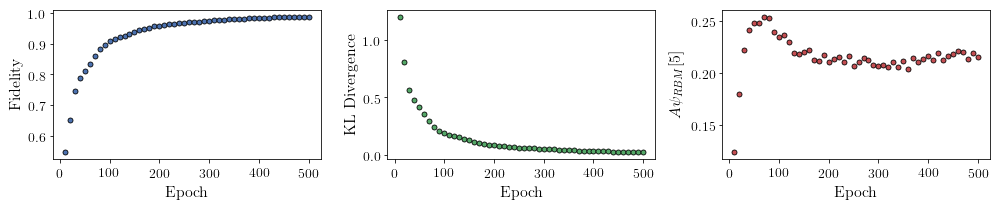

In [193]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
ax = axs[0]
ax.plot(epoch, fidelities, "o", color="C0", markeredgecolor="black")
ax.set_ylabel(r"Fidelity")
ax.set_xlabel(r"Epoch")

ax = axs[1]
ax.plot(epoch, KLs, "o", color="C1", markeredgecolor="black")
ax.set_ylabel(r"KL Divergence")
ax.set_xlabel(r"Epoch")

ax = axs[2]
ax.plot(epoch, coeffs, "o", color="C2", markeredgecolor="black")
ax.set_ylabel(r"$A\psi_{RBM}[5]$")
ax.set_xlabel(r"Epoch")

plt.tight_layout()
plt.savefig("fid_KL.pdf")
plt.show()

In [194]:
nn_state.save("/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/saved_params.pt")

In [196]:
nn_state.weights

Parameter containing:
tensor([[-0.3334, -0.2559,  0.0751,  0.0621,  0.0109,  0.4828,  1.0635,  1.7899,
          2.3865,  1.4415],
        [-0.6964, -1.0828, -0.4484, -0.1678,  0.2103,  0.3155,  0.1505, -0.7557,
         -2.5150, -1.9855],
        [-1.2171, -2.4773, -2.0330, -1.0679,  0.0550,  0.7207,  0.6184,  0.1699,
         -0.1638, -0.2593],
        [ 0.2037,  0.3178,  0.3273,  0.3911, -0.0192, -0.8425, -1.9110, -2.4214,
         -1.6171, -0.4318],
        [ 0.8111,  1.4979,  1.1150,  0.6729,  0.3641,  0.6965,  0.9374,  0.6665,
         -0.2513, -0.3465],
        [-0.3525, -0.3488,  0.0445,  0.0520, -0.8603, -2.0510, -1.8283, -0.8383,
          0.2492,  0.3091],
        [ 1.7107,  2.2573,  0.7507,  0.0520, -0.0820,  0.0814,  0.3321,  0.2159,
         -0.4460, -0.5085],
        [ 0.2009, -0.3491, -1.5924, -2.2818, -1.6282, -0.3137,  0.2718,  0.2203,
          0.0732, -0.1001],
        [-0.2236, -0.3884, -0.6538, -1.2180, -1.6851, -1.6157, -1.0226, -0.2093,
          0.5791,  0.4826

In [197]:
rbm.components_

array([[ 0.304486  ,  0.8106978 ,  1.06425738,  3.28148281,  2.35589358,
        -0.01661051, -0.49752003, -0.33077819,  0.07271698,  0.02082858],
       [ 0.70304674,  2.43053396,  1.16455604, -0.03149146,  0.62139987,
         1.43579018, -0.6493238 , -0.12740823,  0.27557127,  0.6173916 ],
       [-1.98595544, -4.39986318, -1.08056724,  0.558152  ,  0.75618306,
         0.8005421 , -0.4345694 ,  0.09439875,  0.48857363,  0.35935406],
       [-0.28486812, -1.17461053, -2.29640184, -2.57400427, -0.06241784,
         0.27203771, -0.18208376,  0.25344254,  0.24894442,  0.05226596],
       [-0.30004638, -0.16331757,  0.09048875, -0.15221028, -1.04105134,
        -1.77400619, -2.38085198, -0.82988316, -0.46938409,  0.30200201],
       [ 0.01341857, -0.44669072, -0.87112594, -0.76705045, -1.38759023,
        -0.98636663, -0.67152359, -1.41891321, -0.90455494, -0.50228535],
       [-0.0790479 ,  0.02929463, -0.01668326, -0.83024192, -2.5160395 ,
        -2.67786256, -0.74102772, -0.12045277

In [218]:
import torch
def get_psi_quc(nn_state):
    nc = nn_state.weights.shape[-1]
    psi = []
    norm = 0
    for d in range(2**nc):
        dbin = bit_array(np.binary_repr(d, width=10))
        val = nn_state.amplitude(torch.Tensor(dbin))
        psi.append(val[0])
        norm = norm + val*val
    norm = math.sqrt(norm)
    
    for ii in range(len(psi)):
        psi[ii] = psi[ii]/norm
        
    return np.array(psi)

In [219]:
psi_quc = get_psi_quc(nn_state)

In [220]:
psi_quc

array([0.29756127, 0.14222291, 0.08923962, ..., 0.10359893, 0.15315668,
       0.28970396])

In [221]:
np.savetxt('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/quc_psi.txt', psi_quc)